# The Monty Hall Problem

See the [Wikipedia entry](https://en.wikipedia.org/wiki/Monty_Hall_problem) for a summary of the problem.
(But don't rely on Wikipedia for any so called facts!)

## Random door selection

Here's some code to pick a door at random.

In [1]:
# Python provides a library called random to generate pseudo-random numbers and do stuff with them.
import random

# The three doors in a list.
doors = ['yellow', 'red', 'blue']

# Pick a random door.
print(random.choice(doors))

blue


The pick is meant to give a one third probability to each door. Let's pick 10,000 doors are see if that looks correct.

In [2]:
# 10,000 random doors.
tenthous = [random.choice(doors) for i in range(10000)]

tenthous

['blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'red',
 'blue',
 'red',
 'yellow',
 'yellow',
 'blue',
 'blue',
 'yellow',
 'yellow',
 'yellow',
 'red',
 'blue',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'red',
 'yellow',
 'yellow',
 'yellow',
 'red',
 'blue',
 'yellow',
 'blue',
 'yellow',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'yellow',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'yellow',
 'yellow',
 'red',
 'red',
 'blue',
 'red',
 'yellow',
 'red',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'yellow',
 'yellow',
 'yellow',
 'red',
 'yellow',
 'yellow',
 'red',
 'yellow',
 'red',
 'blue',
 'yellow',
 'yellow',
 'blue',
 'red',
 'yellow',
 'yellow',
 'blue',
 'yellow',
 'blue',
 'yellow',
 'red',
 'yellow',
 'red',
 'red',
 'blue',
 'yellow',
 'yellow',
 'blue',
 'blue',
 'blue',
 'blue',
 'yellow',
 'blue',
 'yellow',
 'red',
 'blue',
 'red',
 'yellow',
 'blue',
 'red',
 'blue',
 'blue',
 

Let's plot it now, and see that each door is picked about a third of the time.

In [3]:
import seaborn as sns
import matplotlib.pyplot as pl

pl.figure(figsize=(10, 6))
sns.set(style="darkgrid")
ax = sns.countplot(y=tenthous)
pl.show()

<Figure size 1000x600 with 1 Axes>

## Simulate the game

Let's simulate the game now. Let's:

1. Pick a door to put the car behind.
2. Have the contestant pick a door.
3. Have the show host open one of the other doors to reveal a goat.
4. Ask the contestant if they want to switch.
5. See how often the contestant wins.

The question we're looking to answer is whether staying with your original pick makes a difference.

In [10]:
# A function to simulate a game and tell us if the contestant wins.
def simulate(stay=True):
    doors = ['yellow', 'red', 'blue']
    
    # Put the car behind a random door.
    car = random.choice(doors)
    
    # Have the contestant pick a door.
    
    pick = random.choice(doors)
    
    # Open a door with a goat.
    show = random.choice([door for door in doors if door != car and door != pick])

    # Figure out which door was not opened or picked.
    notopen = [door for door in doors if door != pick and door != show][0]
    
    return (car == [pick, notopen][not stay])

So, we can simulate a game in which the contestant stays with their original pick by running the following. A return value of True means they won the car, False means they didn't.

In [5]:
simulate(stay=True)

True

## Ten thousand times each

Let's run the game 10,000 times where the contestant stays, and then 10,000 where they switch. Then we'll see how often they win in each case.

In [6]:
staying = [simulate(stay=True) for i in range(10000)]

Let's plot the result of staying.

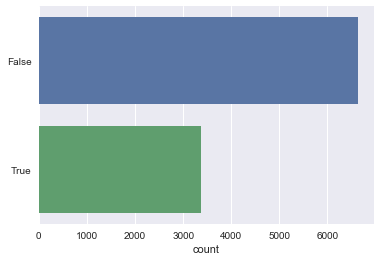

In [7]:
ax = sns.countplot(y=staying)
pl.show()

Looks like when the contestant stays, they win only about a third of the time.

In [8]:
switching = [simulate(stay=False) for i in range(10000)]

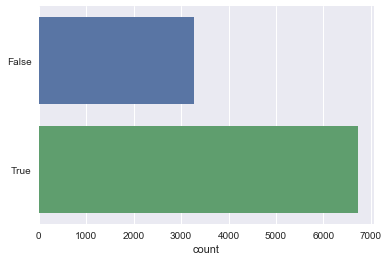

In [9]:
ax = sns.countplot(y=switching)
pl.show()

Looks like you win two thirds of the time if you switch.

## End